# Week 1 Quiz

In [29]:
import os
import scipy
import skimage
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.abspath(''), '..'))
from toolbox import kernel
import imp
imp.reload(kernel)

<module 'toolbox.kernel' from 'c:\\Users\\s183921\\Documents\\02506-advanced-image-analysis\\exam\\..\\toolbox\\kernel.py'>

## 1)
Which number appears when you convolve the image noisy number.png with an appropriately
large Gaussian kernel? (In connection to 1.1.1)


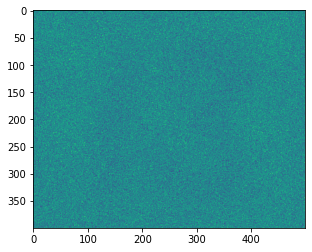

In [30]:
I = io.imread(os.path.join('..', 'solutions', 'Data', 'week1', 'noisy_number.png'))
plt.imshow(I)

First order derivative Gaussian kernel

In [31]:
sigma = 12
g = kernel.gaussian_1d(sigma, size=sigma)

In [32]:
convolve_1D_img = kernel.convolve_img(kernel.convolve_img(I, g), g.T)

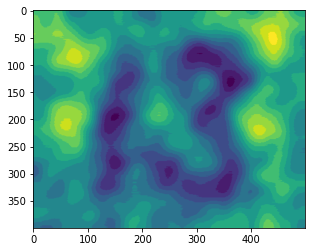

In [33]:
plt.imshow(convolve_1D_img)

Answer: 13

C:\Users\s183921\AppData\Local\Temp/ipykernel_1924/4043588416.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I_noisy = skimage.io.imread(os.path.join('..', 'solutions', 'Data', 'week1', 'noisy_number.png')).astype(np.float)


Text(0.5, 1.0, 'Smoothed with sigma=15')

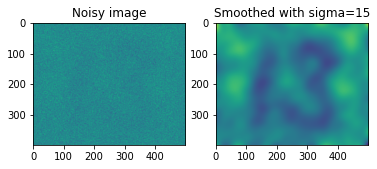

In [34]:
#%% QUESTION 1
I_noisy = skimage.io.imread(os.path.join('..', 'solutions', 'Data', 'week1', 'noisy_number.png')).astype(np.float)
sigma = 15
I_smoothed = scipy.ndimage.gaussian_filter(I_noisy, sigma, mode='nearest')

fig, ax = plt.subplots(1,2)
ax[0].imshow(I_noisy)
ax[0].set_title('Noisy image')
ax[1].imshow(I_smoothed)
ax[1].set_title(f'Smoothed with sigma={sigma}')

Solution

## 2)
What is the boundary length computed from the image fuel_cell_1.tif? (In connection to 1.1.2)

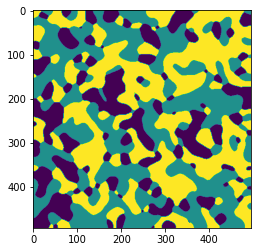

In [35]:
I = io.imread(os.path.join('..', 'solutions', 'Data', 'week1', 'fuel_cells', 'fuel_cell_1.tif'))
plt.imshow(I)

In [36]:
def boundary_length(S):
    lx = S[1:,:]!=S[:-1,:]
    ly = S[:,1:]!=S[:,:-1]
    L = np.sum(lx)+np.sum(ly)
    return L

In [37]:
print(f'Answer: {boundary_length(I)}')

Answer: 16328


Solution

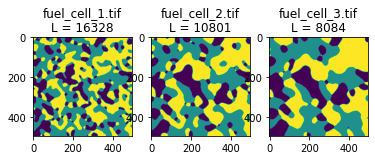

In [38]:
def boundary_length(S):
    L = np.sum(S[1:,:]!=S[:-1,:])+np.sum(S[:,1:]!=S[:,:-1])
    return L

fig, ax = plt.subplots(1,3)
for i in range(3):
    name = f'fuel_cell_{i+1}.tif'
    I = skimage.io.imread(os.path.join('..', 'solutions', 'Data', 'week1', 'fuel_cells', name))
    L = boundary_length(I)
    ax[i].imshow(I)
    ax[i].set_title(f'{name}\nL = {L}')

## 3)
What is the length of the curve computed by smoothing dino_noisy.txt curve using Equation
1.10 and the parameter lambda=0.25? (In connection to 1.1.3)

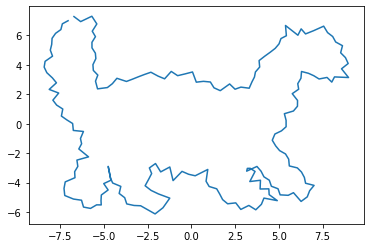

In [39]:
noisy_dino = np.loadtxt(os.path.join('..', 'solutions', 'Data', 'week1', 'curves', 'dino_noisy.txt'))
plt.plot(noisy_dino[:,0], noisy_dino[:,1])
plt.show()

Smoothning dino

In [40]:
N = noisy_dino.shape[0]
a = np.array([-2, 1, 0]) 
D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)
L = a[np.minimum(D,len(a)-1)]

C:\Users\s183921\AppData\Local\Temp/ipykernel_1924/1219999572.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)


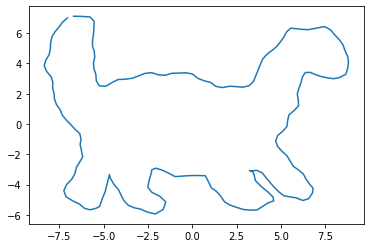

In [42]:
lambda_ = 0.25
smooth_dino = (np.eye(noisy_dino.shape[0]) + lambda_*L) @ noisy_dino
plt.plot(smooth_dino[:,0], smooth_dino[:,1])
plt.show()

In [47]:
def curve_length(X):
    d = (np.sqrt(((X-np.roll(X, shift=1, axis=0))**2).sum(axis=1))).sum()
    return(d)

print(f'Answer: {curve_length(smooth_dino)}')

Answer: 77.37190409505692


Solution

C:\Users\s183921\AppData\Local\Temp/ipykernel_1924/4267414995.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)


(-9.2778371, 9.8468971, -6.7972268, 7.9649228)

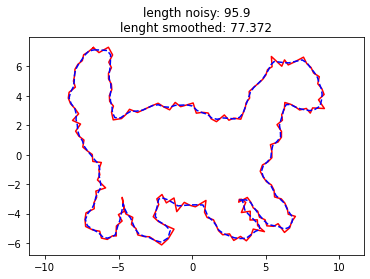

In [46]:
X_noisy = np.loadtxt(os.path.join('..', 'solutions', 'Data', 'week1', 'curves', 'dino_noisy.txt'))
N = X_noisy.shape[0]

def curve_length(X):
    d = (np.sqrt(((X-np.roll(X, shift=1, axis=0))**2).sum(axis=1))).sum()
    return(d)

a = np.array([-2, 1, 0]) 
D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)
L = a[np.minimum(D,len(a)-1)]

X_solution = np.matmul(0.25*L+np.eye(N),X_noisy)

closed_ind = np.r_[np.arange(N),0] # for easy plotting a closed snake
fig, ax = plt.subplots()
ax.plot(X_noisy[closed_ind,0], X_noisy[closed_ind,1],'r')
ax.plot(X_solution[closed_ind,0], X_solution[closed_ind,1],'b--')
ax.set_title(f'length noisy: {curve_length(X_noisy):.5g}\n'+
             f'lenght smoothed: {curve_length(X_solution):.5g}')
ax.axis('equal')